In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score
from PIL import Image, ImageChops
import time
import copy
import random
import os

from sklearn.model_selection import train_test_split

In [3]:
def get_image(path):
  test_img = Image.open(path)
  test_img = test_img.resize((24, 24))
  test_x = np.array(test_img, np.float32)
  test_x = test_x / 255.0
  return test_x

In [4]:
r1 = '/content/drive/My Drive/Нейронки/lab4/1/'
r2 = '/content/drive/My Drive/Нейронки/lab4/2/'
r5 ='/content/drive/My Drive/Нейронки/lab4/5/'
x = []
y = []
print(os.listdir(r1))
# Добавление 1 рубля
for filename in os.listdir(r1):
  x.append(get_image(os.path.join(r1, filename)))
  y.append(0)
# Добавление 2 рублей
for filename in os.listdir(r2):
  x.append(get_image(os.path.join(r2, filename)))
  y.append(1)
# Добавление 5 рублей
for filename in os.listdir(r5):
  x.append(get_image(os.path.join(r5, filename)))
  y.append(2)


['013__1 Ruble_russia.jpg', '036__1 Ruble_russia.jpg', '030__1 Ruble_russia.jpg', '025__1 Ruble_russia.jpg', '027__1 Ruble_russia.jpg', '029__1 Ruble_russia.jpg', '014__1 Ruble_russia.jpg', '023__1 Ruble_russia.jpg', '002__1 Ruble_russia.jpg', '005__1 Ruble_russia.jpg', '028__1 Ruble_russia.jpg', '012__1 Ruble_russia.jpg', '032__1 Ruble_russia.jpg', '016__1 Ruble_russia.jpg', '022__1 Ruble_russia.jpg', '003__1 Ruble_russia.jpg', '015__1 Ruble_russia.jpg', '001__1 Ruble_russia.jpg', '011__1 Ruble_russia.jpg', '021__1 Ruble_russia.jpg', '033__1 Ruble_russia.jpg', '009__1 Ruble_russia.jpg', '024__1 Ruble_russia.jpg', '008__1 Ruble_russia.jpg', '026__1 Ruble_russia.jpg', '018__1 Ruble_russia.jpg', '035__1 Ruble_russia.jpg', '007__1 Ruble_russia.jpg', '004__1 Ruble_russia.jpg', '020__1 Ruble_russia.jpg', '034__1 Ruble_russia.jpg', '010__1 Ruble_russia.jpg']


In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=42)

In [6]:
x_tr = []
x_tst = []

for i in range(len(x_train)):
  x = []
  for j in range(len(x_train[0])):
    for k in range(len(x_train[0][0])):
      x.extend(1 - x_train[i][j][k][:3])
  x_tr.append(x)
print(len(x_tr[0]))

for i in range(len(x_test)):
  x = []
  for j in range(len(x_test[0])):
    for k in range(len(x_test[0][0])):
      x.extend(1 - x_test[i][j][k][:3])
  x_tst.append(x)
print(len(x_tst[0]))

1728
1728


In [7]:
def fun_sigmoid(s):
  return 1 / (1 + np.exp(-s))

def fun_der_sigm(s):
  return fun_sigmoid(s) * (1 - fun_sigmoid(s))

def err_acc(pred_y, tst_y, eps):
  hit = 0
  for i in range(len(tst_y)):
    if(np.abs(pred_y[i] - tst_y[i]) < eps): hit = hit + 1
  return hit / len(tst_y)

class Neuron:
  def __init__(self, weightsCount, number = None):
    if number is None: 
      self.weights = []
      for i in range(weightsCount):
        self.weights.append(random.randint(-3, 3))
    else:
      self.weights = [] 
      for i in range(weightsCount):
        self.weights.append(number)

  def get_sum(self, x):
    sum = 0
    for i in range(len(self.weights)):
      sum += self.weights[i] * x[i]
    return sum

  def feed(self, x):
    y = fun_sigmoid(self.get_sum(x))
    return y

  def print_params(self):
    n_str = ''
    for i in range(len(self.weights)):
      n_str += str(self.weights[i]) + " "
    print(n_str + str(self.bias))

In [8]:
def err_los_mc(tst_y, pred_y):
  loss = 0
  for i in range(len(tst_y)):
    for j in range(len(tst_y[0])):
      loss += np.square(pred_y[i][j] - tst_y[i][j])
  loss = np.sqrt(loss) / len(tst_y)
  return loss

def add_bias_to_data(data):
  data_with_bias = list(copy.deepcopy(data))
  for elem in data_with_bias:
    elem.append(1)
  return np.array(data_with_bias)

In [9]:
def y_to_arrays(y_t):
  y_arrays = []
  for y in y_t:
    y_arr = np.zeros(np.array(y_t).max() + 1, dtype = int)
    y_arr = y_arr.tolist()
    y_arr[y] = 1
    y_arrays.append(y_arr)
  return y_arrays

def arrays_to_y(y_arrays):
  y_t = []
  for y in y_arrays:
    y_t.append(np.argmax(y))
  return y_t

In [10]:
class NetworkMC:
  def __init__(self, x_count, l1_count, l2_count, l3_count, y_count):
    self.NeuronsL1 = []
    self.NeuronsL2 = []
    self.NeuronsL3 = []
    self.out_layer = []
    for i in range(l1_count):
      n = Neuron(x_count + 1)
      self.NeuronsL1.append(n)
    for i in range(l2_count):
      n = Neuron(l1_count + 1)
      self.NeuronsL2.append(n)
    for i in range(l3_count):
      n = Neuron(l2_count + 1)
      self.NeuronsL3.append(n)
    for i in range(y_count):
      n = Neuron(l3_count + 1)
      self.out_layer.append(n)

  def predict(self, data):
    data_with_bias = add_bias_to_data(data)
    y_pred = []
    for x in data_with_bias:
      y = []
      res1 = []
      for n in self.NeuronsL1:
        res1.append(n.feed(x))
      res1.append(1)
      res2 = []
      for n in self.NeuronsL2:
        res2.append(n.feed(res1))
      res2.append(1)
      res3 = []
      for n in self.NeuronsL3:
        res3.append(n.feed(res2))
      res3.append(1)
      for n in self.out_layer:
        y.append(n.feed(res3))
      y_pred.append(y)
    return y_pred

  def train_grad_full_batch(self, data, y_trues, speed, epochs):
    data_with_bias = add_bias_to_data(data)
    y_trues_arr = y_to_arrays(y_trues) 
    errs = []
    epchs = []
    for epoch in range(epochs):
      for x, y_true in zip(data_with_bias, y_trues_arr):
        self.grad_iteration(x, y_true, speed)
      if (epoch + 1) % (epochs // 20) == 0 or epoch == 0:
        y_preds = self.predict(data)
        err = err_los_mc(y_trues_arr, y_preds)
        acc = err_acc(y_trues, arrays_to_y(y_preds), 0.1)
        epchs.append(epoch)
        errs.append(err)
        print("Epoch %d err: %.3f" % (epoch, err))
        print("Epoch %d acc: %.3f" % (epoch, acc))
        if acc > 0.99 and err < 0.05:
          break
    return epchs, errs

  def train_grad_stochastic(self, data, y_trues, speed, epochs):
    data_with_bias = add_bias_to_data(data)
    y_trues_arr = y_to_arrays(y_trues) 
    errs = []
    epchs = []
    for epoch in range(epochs + 1):
      if (epoch + 1) % (epochs // 20) == 0 or epoch == 0:
        y_preds = self.predict(data)
        err = err_los_mc(y_trues_arr, y_preds)
        epchs.append(epoch)
        errs.append(err)
        acc = err_acc(y_trues, arrays_to_y(y_preds), 0.1)
        print("Epoch %d err: %.3f" % (epoch, err))
        print("Epoch %d acc: %.3f" % (epoch, acc))
        if acc > 0.99 and err < 0.05:
          break
      n_rule = np.random.randint(0, len(data_with_bias))
      x = data_with_bias[n_rule]
      y_true = y_trues_arr[n_rule]
      self.grad_iteration(x, y_true, speed)
    return epchs, errs
  
  def grad_iteration(self, x, y_true, speed):
    res1 = []
    for n in self.NeuronsL1:
      res1.append(n.feed(x))
    res1.append(1)
    res2 = []
    for n in self.NeuronsL2:
      res2.append(n.feed(res1))
    res2.append(1)
    res3 = []
    for n in self.NeuronsL3:
      res3.append(n.feed(res2))
    res3.append(1)
    out = []
    for n in self.out_layer:
      out.append(n.feed(res3))
    
    old_growth1 = []
    # Изменение весов на выходном слое
    grad = []
    for j in range(len(out)):
      delta = out[j] - y_true[j]
      grad.append(delta * fun_der_sigm(out[j]))
      for i in range(len(res3)):
        self.out_layer[j].weights[i] = self.out_layer[j].weights[i] - speed * grad[j] * res3[i]
    
    # Изменение весов на третьем слое 
    grad2 = []
    for i in range(len(res3)):
      grad_sum = 0
      for j in range(len(self.out_layer)):
        grad_sum += grad[j] * self.out_layer[j].weights[i] * fun_der_sigm(res3[i])
      grad2.append(grad_sum)
    for i in range(len(self.NeuronsL3)):
      for j in range(len(res2)):
        self.NeuronsL3[i].weights[j] = self.NeuronsL3[i].weights[j] - speed * grad2[i] * res2[j]

    # Изменение весов на втором слое
    grad3 = []
    for i in range(len(res2)):
      grad_sum = 0
      for j in range(len(self.NeuronsL3)):
        grad_sum += grad2[j] * self.NeuronsL3[j].weights[i] * fun_der_sigm(res2[i])
      grad3.append(grad_sum)
    for i in range(len(self.NeuronsL2)):
      for j in range(len(res1)):
        self.NeuronsL2[i].weights[j] = self.NeuronsL2[i].weights[j] - speed * grad3[i] * res1[j]

    # Изменение весов на первом слое
    grad4 = []
    for i in range(len(res1)):
      grad_sum = 0
      for j in range(len(self.NeuronsL2)):
        grad_sum += grad3[j] * self.NeuronsL2[j].weights[i] * fun_der_sigm(res1[i])
      grad4.append(grad_sum)
    for i in range(len(self.NeuronsL1)):
      for j in range(len(x)):
        self.NeuronsL1[i].weights[j] = self.NeuronsL1[i].weights[j] - speed * grad4[i] * x[j]

In [11]:
network = NetworkMC(1728, 64, 32, 16, 3)
epochs, errors = network.train_grad_stochastic(x_tr, y_train, 0.01, 1000)

Epoch 0 err: 0.102
Epoch 0 acc: 0.372
Epoch 49 err: 0.102
Epoch 49 acc: 0.337
Epoch 99 err: 0.106
Epoch 99 acc: 0.360
Epoch 149 err: 0.104
Epoch 149 acc: 0.302
Epoch 199 err: 0.102
Epoch 199 acc: 0.267
Epoch 249 err: 0.105
Epoch 249 acc: 0.233
Epoch 299 err: 0.096
Epoch 299 acc: 0.360
Epoch 349 err: 0.093
Epoch 349 acc: 0.349
Epoch 399 err: 0.103
Epoch 399 acc: 0.302
Epoch 449 err: 0.100
Epoch 449 acc: 0.360
Epoch 499 err: 0.090
Epoch 499 acc: 0.395
Epoch 549 err: 0.093
Epoch 549 acc: 0.349


<ipython-input-7-e171b8416fc6>:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-s))


Epoch 599 err: 0.096
Epoch 599 acc: 0.302
Epoch 649 err: 0.097
Epoch 649 acc: 0.326
Epoch 699 err: 0.094
Epoch 699 acc: 0.395
Epoch 749 err: 0.088
Epoch 749 acc: 0.523
Epoch 799 err: 0.097
Epoch 799 acc: 0.279
Epoch 849 err: 0.095
Epoch 849 acc: 0.314
Epoch 899 err: 0.097
Epoch 899 acc: 0.279
Epoch 949 err: 0.093
Epoch 949 acc: 0.326
Epoch 999 err: 0.092
Epoch 999 acc: 0.430


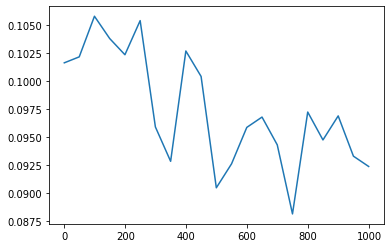

In [12]:
plt.plot(epochs, errors)
plt.plot
plt.show()

In [13]:
def get_res(y):
  if y > 0.5:
    return 1
  return 0

def get_res_multy(y):
  return np.argmax(y)

<ipython-input-7-e171b8416fc6>:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-s))


[[0.3016697551114104, 0.5910523088489739, 0.348065513426082], [0.4547630501039648, 0.10794124962793526, 0.41704773638501763], [0.6569103442230689, 0.04062151350945827, 0.2908523746542715], [0.25590025817115813, 0.257163682857229, 0.4042654134437617], [0.4130816645981601, 0.11316091789380349, 0.38167376432999545], [0.4547630501039648, 0.10794124962793526, 0.41704773638501763], [0.6569103442230689, 0.04062151350945827, 0.2908523746542715], [0.14046002402353872, 0.6536036621673971, 0.2799052758385246], [0.3621393965066432, 0.4872651184540253, 0.3847397716000553], [0.03451060577308408, 0.6391130123961893, 0.20390229322039932]]
acc:0.2


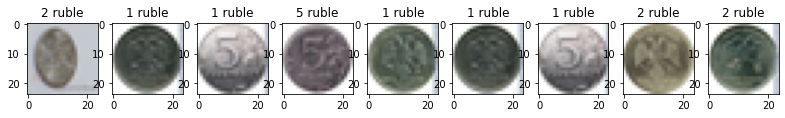

In [14]:
y_pred = network.predict(x_tst)
y_pred_classes = []
print(y_pred)
for i in range(len(y_pred)):
  y_pred_classes.append(get_res_multy(y_pred[i]))
acc = err_acc(y_test, y_pred_classes, 0.1)
print("acc:" + str(acc))
ress = ['1 ruble', '2 ruble', '5 ruble']
plt.figure(figsize=(15,5))
for i in range(9):
  plt.subplot(1, 10, i + 1)
  
  plt.title(ress[get_res_multy(y_pred[i])])
  plt.imshow(x_test[i])